In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [144]:
data = pd.read_csv('navnestatistikk-for-theo.csv')

#set index til category
data.set_index('Category', inplace=True)

#drop alle verdier sim er 0.0
data = data[data['Theo'] != 0.0]

#kolonnen theo er i prosent, så vi deler på 100
data['Theo'] = data['Theo'] / 100

#drop alle verdier hvor Cateogry er lavere enn 1990
data = data[data.index >= 1990]

#gi nytt navn til index
data.index.names = ['År']

In [145]:
barn = pd.read_csv('barn.csv')

#set indexen til å være år
barn = barn.set_index('År')


In [146]:
#slå sammen data og barn
data = pd.concat([data, barn], axis=1)

# lag en ny kolonne som er Theo ganget med antall barn for å få absolutt antall
data['Antall_Theo'] = data['Theo'] * data['Barn']

#endre "Antall_Theo" til å kun være heltall rundet opp til nærmeste heltall
data['Antall_Theo'] = data['Antall_Theo'].apply(np.ceil)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


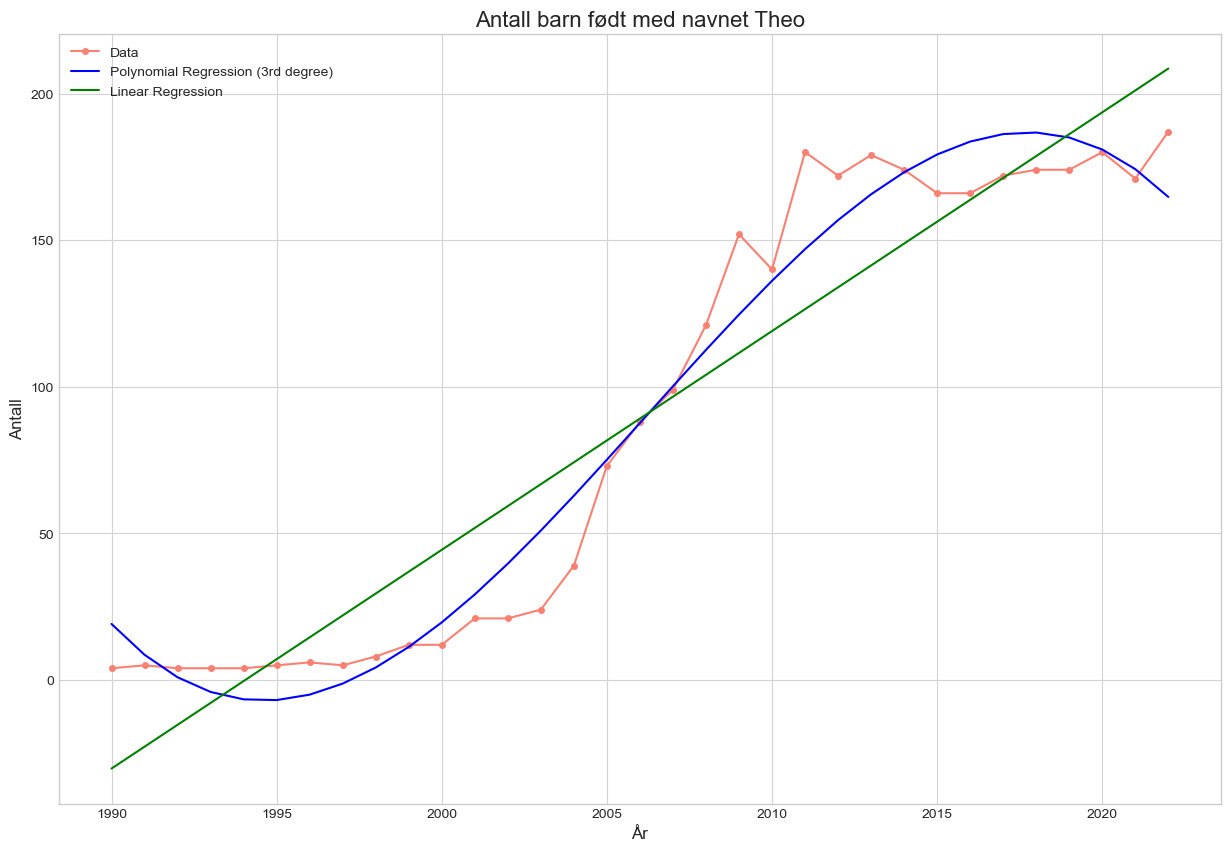

In [147]:

# Get the data
x = data.index.values
y = data['Antall_Theo']

# Perform polynomial regression
degree = 3  # Choose the degree of the polynomial
coefficients = np.polyfit(x, y, degree)
regression_line_poly = np.poly1d(coefficients)

# Perform linear regression with statsmodels
x_linear = sm.add_constant(x)
model_linear = sm.OLS(y, x_linear)
results_linear = model_linear.fit()
regression_line_linear = results_linear.predict(x_linear)

# Plot the time series
plt.figure(figsize=(15, 10))
plt.plot(x, y, marker='o', linestyle='-', markersize=4, color='salmon', linewidth=1.5, label='Data')

# Plot the polynomial regression line
plt.plot(x, regression_line_poly(x), linestyle='-', color='blue', linewidth=1.5, label='Polynomial Regression (3rd degree)')

# Plot the linear regression line
plt.plot(x, regression_line_linear, linestyle='-', color='green', linewidth=1.5, label='Linear Regression')

# Add gridlines
plt.grid(color='lightgray')

# Set the title and labels
plt.title('Antall barn født med navnet Theo', fontsize=16)
plt.xlabel('År', fontsize=12)
plt.ylabel('Antall', fontsize=12)

# Adjust the tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend
plt.legend()

# Show the plot
plt.show()



In [148]:

# Get the data
x = data.index.values.astype(float)
y = data['Antall_Theo']

# Perform linear regression with statsmodels
x_linear = sm.add_constant(x)
model_linear = sm.OLS(y, x_linear)
results_linear = model_linear.fit()
linear_intercept, linear_slope = results_linear.params

# Perform polynomial regression
degree = 3  # Choose the degree of the polynomial
coefficients = np.polyfit(x, y, degree)
poly_regression = np.poly1d(coefficients)

# Define future years
future_years = np.array([2025, 2030, 2035, 2040, 2045, 2050]).astype(float)

# Create a table to store predictions
predictions_table = pd.DataFrame({'Year': future_years})

# Predict using linear regression
linear_predictions = linear_intercept + linear_slope * future_years
predictions_table['Linear Regression'] = linear_predictions

# Predict using polynomial regression
poly_predictions = poly_regression(future_years)
predictions_table['Polynomial Regression'] = poly_predictions

# Display the predictions table
print(predictions_table)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
     Year  Linear Regression  Polynomial Regression
0  2025.0         230.889483             117.738646
1  2030.0         268.188948             -33.742242
2  2035.0         305.488414            -297.000518
3  2040.0         342.787879            -695.497789
4  2045.0         380.087344           -1252.695663
5  2050.0         417.386809           -1992.055750
